### Loan Data
- This dataset consists of more than 9,500 loans with information on the loan structure, the borrower, and whether the loan was pain back in full. 
- This data was extracted from LendingClub.com, which is a company that connects borrowers with investors.
- We've included a few suggested questions at the end of this template to help you get started.

#### Scenarios are broader questions to help you develop an end-to-end project
- Our company wants to automate loan approvals. 
- I would like you to build a classifier to predict whether a loan will be paid back based on this data. 
- There are two things to note. First, there is class imbalance; there are fewer examples of loans not fully paid. Second, it's more important to accurately predict whether a loan will not be paid back rather than if a loan is paid back. I want to know how you accounted for this in training and evaluation your model.
- You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.

__Challenges are brief tasks designed to help you practice specific skills:__

- 🗺️ __Explore:__ Generate a correlation matrix between the numeric columns. What columns are positively and negatively correlated with each other? Does it change if you segment it by the purpose of the loan?
- 📊 __Visualize:__ Plot histograms for every numeric column with a color element to segment the bars by not_fully_paid.
- 🔎 __Analyze:__ Do loans with the same purpose have similar qualities not shared by loans with differing purposes? You can consider only fully paid loans.


### Business Problem and motivation 
- When it comes to digital lending, profitability is closely tied to a robust data strategy and effective credit modeling. As data analysts, our goal is to develop analytics models that enable the lending institution to not only make informed lending decisions but also monitor the financial health of its clients. In this report, we will focus on creating a model that aids digital lenders in making lending decisions based on the client data they have acquired. (McKinsey, 2021)

- Our hypothesis revolves around leveraging the client's loan history and credit records to predict the likelihood of non-full payment for their loans. We believe that by employing advanced techniques such as feature selection using the Recursive Feature Elimination (RFE) method with an ensemble model, we can enhance the accuracy of our predictions. Additionally, we aim to fine-tune our model by utilizing techniques like hyper-parameter tuning, Synthetic Minority Oversampling Technique (SMOTE), and k-fold cross-validation to further improve its performance, particularly in terms of recall.

- By developing such a model, we aim to provide digital lenders with a powerful tool that enhances their decision-making process and mitigates the risk associated with lending. It enables them to proactively identify clients who are more likely to default on their loan payments, allowing for more targeted interventions and risk management strategies. Through our research and analysis, we seek to empower our junior data analysts with the knowledge and skills required to contribute effectively to the development of data-driven lending solutions.

- Remember, as data analysts, our work is crucial in ensuring the success and profitability of digital lending institutions. By leveraging data and employing advanced analytics techniques, we can provide valuable insights that inform lending decisions, improve risk management, and ultimately contribute to the financial stability and growth of the organization.

In [2]:
# Data Manipulation and Analysis
import numpy as np
import pandas as pd

# Timing and Performance Measurement
from timeit import default_timer as timer
import time

# Data Manipulation and Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import resample, shuffle
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_selection import RFE, RFECV
from sklearn.preprocessing import StandardScaler


# Models and Algorithms
from sklearn.manifold import TSNE
from sklearn.svm import SVR, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, KFold

# Evaluation Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, precision_recall_curve

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Imbalanced Data Handling
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE

#warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("loan_data.csv")

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
# Assuming your DataFrame is named 'df'
df.rename(columns={
    'credit.policy': 'Credit_Policy',
    'purpose': 'Purpose',
    'int.rate': 'Interest_Rate',
    'installment': 'Installment',
    'log.annual.inc': 'Log_Annual_Income',
    'dti': 'DTI',
    'fico': 'FICO',
    'days.with.cr.line': 'Days_with_Credit_Line',
    'revol.bal': 'Revolving_Balance',
    'revol.util': 'Revolving_Utilization',
    'inq.last.6mths': 'Inquiries_Last_6_Months',
    'delinq.2yrs': 'Delinquencies_in_2_Years',
    'pub.rec': 'Public_Records',
    'not.fully.paid': 'Not_Fully_Paid'
}, inplace=True)

In [6]:
df.sample(15)

,Credit_Policy,Purpose,Interest_Rate,Installment,Log_Annual_Income,DTI,FICO,Days_with_Credit_Line,Revolving_Balance,Revolving_Utilization,Inquiries_Last_6_Months,Delinquencies_in_2_Years,Public_Records,Not_Fully_Paid
9122,0,debt_consolidation,0.1221,59.97,10.404263,1.93,687,8280.000000,1469,22.3,4,1,0,0
3136,1,small_business,0.1411,855.73,12.072541,17.75,707,4260.000000,76237,44.5,2,0,0,1
4127,1,credit_card,0.0894,201.75,10.491274,21.60,732,3303.000000,4508,18.6,0,0,0,0
4754,1,major_purchase,0.1253,83.67,11.156193,10.68,702,5820.000000,4403,88.1,0,0,0,0
1551,1,debt_consolidation,0.1051,260.06,11.002100,23.46,717,3403.041667,44282,61.2,1,0,0,0
1297,1,all_other,0.1222,79.97,10.635855,22.36,677,5580.000000,12785,77.2,2,0,0,0
213,1,credit_card,0.1091,604.88,10.858999,17.56,707,8061.000000,32438,43.0,0,1,0,0
5561,1,all_other,0.1183,313.95,11.225243,14.48,727,2789.958333,12829,63.5,0,0,0,0
7858,0,credit_card,0.0933,319.54,11.050890,0.82,717,346.000000,0,0.0,2,0,0,0
4560,1,debt_consolidation,0.1322,255.20,10.499490,13.49,682,2729.958333,13847,74.4,0,0,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Credit_Policy             9578 non-null   int64  
 1   Purpose                   9578 non-null   object 
 2   Interest_Rate             9578 non-null   float64
 3   Installment               9578 non-null   float64
 4   Log_Annual_Income         9578 non-null   float64
 5   DTI                       9578 non-null   float64
 6   FICO                      9578 non-null   int64  
 7   Days_with_Credit_Line     9578 non-null   float64
 8   Revolving_Balance         9578 non-null   int64  
 9   Revolving_Utilization     9578 non-null   float64
 10  Inquiries_Last_6_Months   9578 non-null   int64  
 11  Delinquencies_in_2_Years  9578 non-null   int64  
 12  Public_Records            9578 non-null   int64  
 13  Not_Fully_Paid            9578 non-null   int64  
dtypes: float

In [8]:
col_schema = {
    'Credit_Policy': 'Binary value indicating whether an individual meets the credit policy or not.',
    'Purpose': 'The purpose or reason for the loan or credit.',
    'Interest_Rate': 'The interest rate assigned to the loan or credit.',
    'Installment': 'The monthly installment amount to be paid towards the loan or credit.',
    'Log_Annual_Income': 'The natural logarithm of the individual\'s annual income.',
    'DTI': 'The debt-to-income ratio, representing the percentage of the individual\'s monthly debt payments relative to their monthly income.',
    'FICO': 'The FICO credit score of the individual.',
    'Days_with_Credit_Line': 'The number of days the individual has had a credit line.',
    'Revolving_Balance': 'The revolving balance, representing the amount owed on revolving credit accounts such as credit cards.',
    'Revolving_Utilization': 'The revolving utilization rate, representing the percentage of the individual\'s available credit that is being used.',
    'Inquiries_Last_6_Months': 'The number of inquiries made by the individual in the last 6 months.',
    'Delinquencies_in_2_Years': 'The number of delinquencies (late payments) the individual has had in the past 2 years.',
    'Public_Records': 'The number of public records (e.g., bankruptcies, tax liens) the individual has.',
    'Not_Fully_Paid': 'Binary value indicating whether the individual has fully paid off their loan or credit.',
    'Installment_Interact': 'Interaction between installment and interest rates'
}


In [9]:
col_schema["Credit_Policy"]

'Binary value indicating whether an individual meets the credit policy or not.'

In [10]:
df.describe()

,Credit_Policy,Interest_Rate,Installment,Log_Annual_Income,DTI,FICO,Days_with_Credit_Line,Revolving_Balance,Revolving_Utilization,Inquiries_Last_6_Months,Delinquencies_in_2_Years,Public_Records,Not_Fully_Paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


- mean > std: data is clustered around the average for most instances

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

def plot(data, plot_type, *features):
    sns.set(style='darkgrid')
    num_plots = len(features)
    num_cols = math.ceil(math.sqrt(num_plots))
    num_rows = math.ceil(num_plots / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        ax = axes[i]
        if plot_type == 'histplot':
            sns.histplot(data=data, x=feature, bins=10, ax=ax, kde=True)
        elif plot_type == 'boxplot':
            sns.boxplot(data=data, x=feature, ax=ax)
        elif plot_type == 'violinplot':
            sns.violinplot(data=data, x=feature, ax=ax)
        ax.set_title(feature)

    # Remove any unused subplots
    if len(features) < len(axes):
        for j in range(len(features), len(axes)):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

In [12]:
df.columns

Index(['Credit_Policy', 'Purpose', 'Interest_Rate', 'Installment',
       'Log_Annual_Income', 'DTI', 'FICO', 'Days_with_Credit_Line',
       'Revolving_Balance', 'Revolving_Utilization', 'Inquiries_Last_6_Months',
       'Delinquencies_in_2_Years', 'Public_Records', 'Not_Fully_Paid'],
      dtype='object')

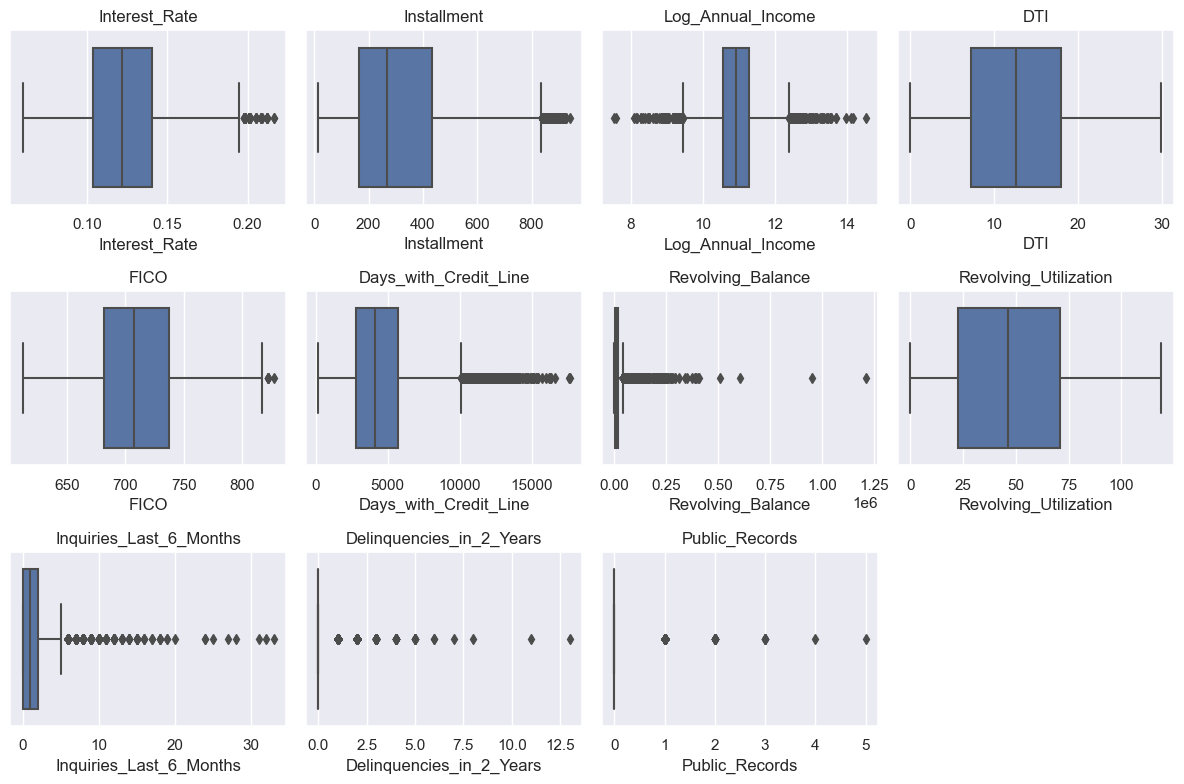

In [13]:
plot(df, 'boxplot', 'Interest_Rate', 'Installment',
       'Log_Annual_Income', 'DTI', 'FICO', 'Days_with_Credit_Line',
       'Revolving_Balance', 'Revolving_Utilization', 'Inquiries_Last_6_Months',
       'Delinquencies_in_2_Years', 'Public_Records')

- interest has a tail on the right side end, which means there are only few loans with higher interest rates
- same goes for the installments, maybe there is a correlation i need to check
- As for other features, i need to study

# EDA

<AxesSubplot:xlabel='Not_Fully_Paid', ylabel='count'>

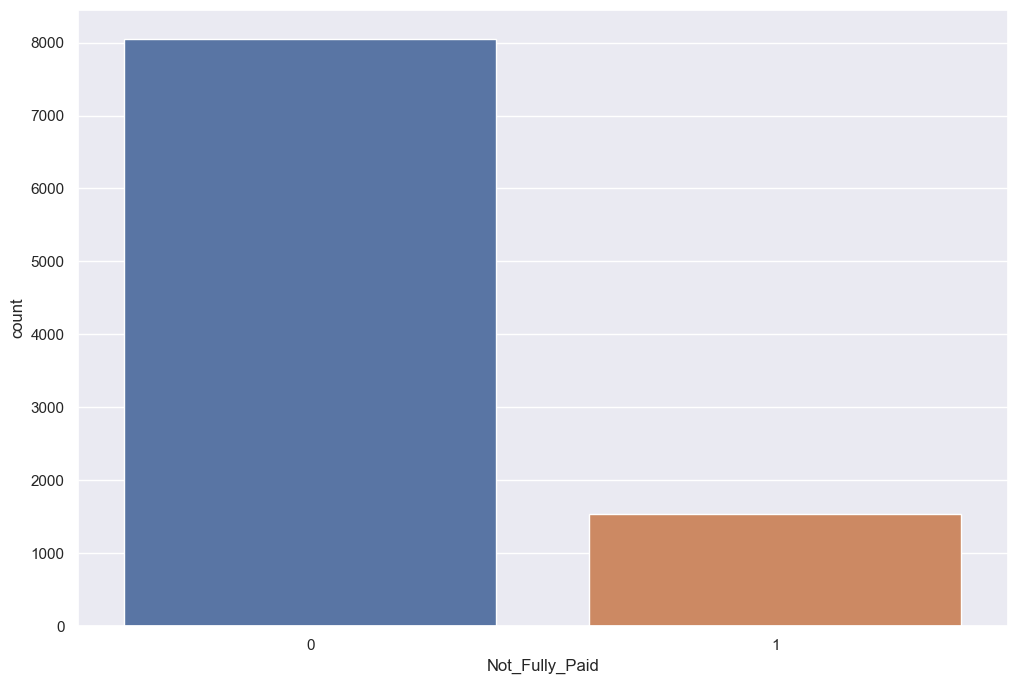

In [64]:
sns.countplot(data = df, x = "Not_Fully_Paid")

<AxesSubplot:>

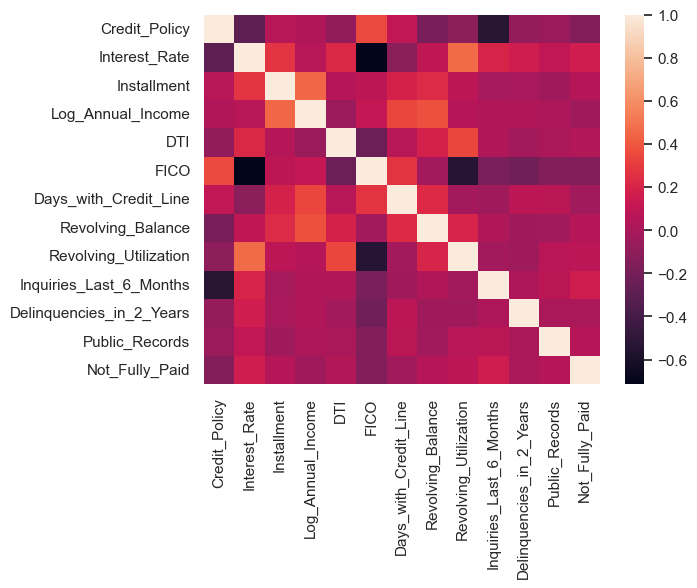

In [14]:
sns.heatmap(df.corr())

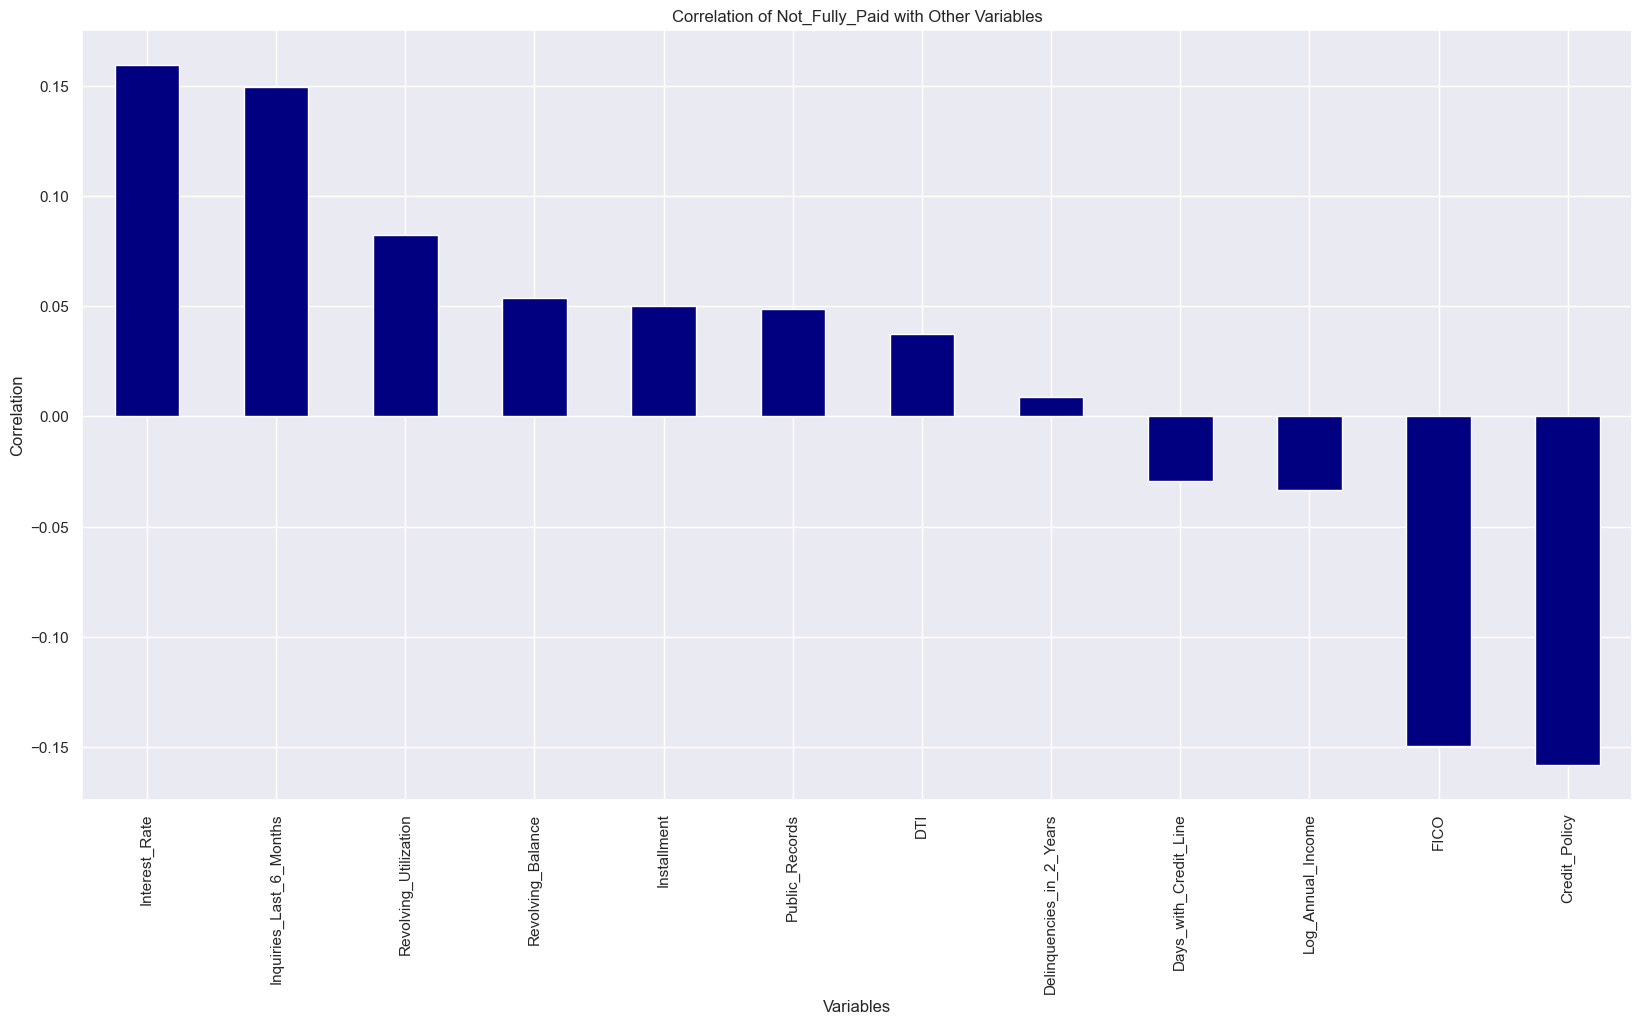

In [15]:
correlation = df.corr()['Not_Fully_Paid'].drop('Not_Fully_Paid')  # Calculate correlation excluding 'Not_Fully_Paid'
correlation.sort_values(ascending=False).plot(kind='bar', figsize=(20, 10), color='navy')  # Plot the correlation values

plt.title("Correlation of Not_Fully_Paid with Other Variables")
plt.xlabel("Variables")
plt.ylabel("Correlation")

plt.show()


# Purpose

In [16]:
df["Purpose"].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [17]:
df_purpose = df.groupby("Purpose")["Not_Fully_Paid"].sum().reset_index()

<AxesSubplot:xlabel='Not_Fully_Paid', ylabel='Purpose'>

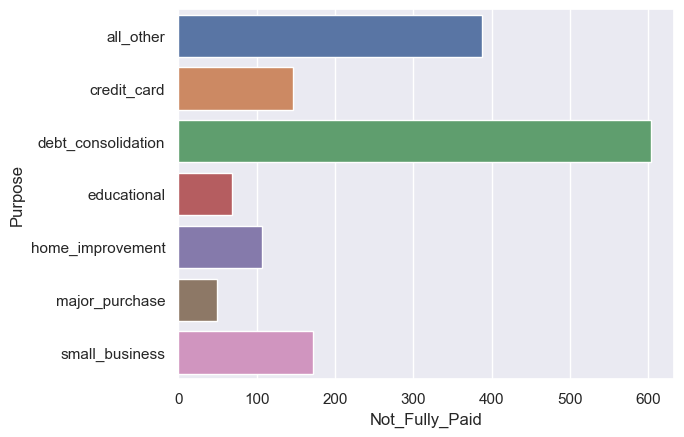

In [18]:
sns.barplot(data = df_purpose,
           x = "Not_Fully_Paid",
            y = "Purpose")

do i need to figure out what "all_other" means ?
- debt_consolidation: Loan taken to consolidate multiple debts into a single payment.
- credit_card: Loan used for credit card debt consolidation or payment.
- all_other: Loan taken for purposes not categorized under specific labels.
- home_improvement: Loan used for home renovation or improvement projects.
- small_business: Loan taken to support or finance a small business.
- major_purchase: Loan used for significant purchases like a car or furniture.
- educational: Loan taken for educational expenses or student loans.

In [19]:
df_interest = df.groupby("Purpose")["Interest_Rate"].mean().reset_index()

In [20]:
df_purpose_1 = (df.groupby("Purpose")["Not_Fully_Paid"].count() - df.groupby("Purpose")["Not_Fully_Paid"].sum()).reset_index()
df_purpose_1.columns = ["Purpose", "Not_Paid"]

In [21]:
df_purpose = pd.merge(df_purpose, df_purpose_1, on = "Purpose")
df_purpose = pd.merge(df_purpose, df_interest, on = "Purpose")

In [22]:
df_purpose.columns = ["Purpose", "Paid", "Not_Paid", "Interest_Rate"]

In [23]:
df_purpose.describe()

,Paid,Not_Paid,Interest_Rate
count,7.00000,7.000000,7.000000
mean,219.00000,1149.285714,0.121825
std,202.96223,1134.740604,0.008145
min,49.00000,274.000000,0.114171
25%,88.00000,417.500000,0.117139
50%,146.00000,522.000000,0.119738
75%,279.50000,1530.000000,0.123251
max,603.00000,3354.000000,0.138087


small_business has the highest interest rates they are at the third place 

In [24]:
df_purpose['Percentage_Not_Paid'] = ((df_purpose['Not_Paid'] / (df_purpose['Paid'] + df_purpose['Not_Paid'])) * 100).round(1)

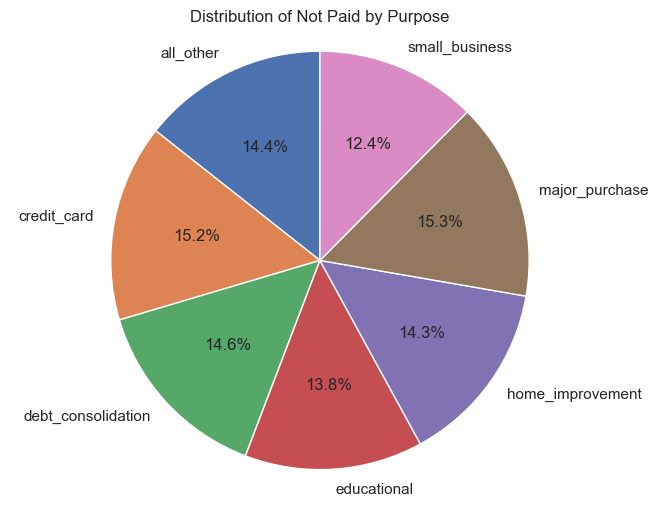

In [25]:
labels = df_purpose['Purpose']
sizes = df_purpose['Percentage_Not_Paid']

plt.figure(figsize=(8, 6)) 
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)        
plt.title('Distribution of Not Paid by Purpose')
plt.axis('equal') 
plt.show() 


- The **"debt_consolidation" category has the highest count of paid loans (603) and not paid loans (3354), indicating that it is the most common purpose for taking loans**.

- the **"small_business" category has the highest percentage of not paid loans (72.2%)**, suggesting a higher risk associated with loans taken for small business purposes.

- The "major_purchase" category has the lowest interest rate (0.114171), while the **"small_business" category has the highest interest rate (0.138087)**. This difference in interest rates across purposes may reflect varying levels of risk or market conditions associated with different loan purposes.

- Percentage Not Paid: The **"major_purchase" and "credit_card" categories have the highest percentages of not paid loans, with 88.8% and 88.4% respectively**.

- the **"educational" category has the lowest percentage of not paid loans (79.9%)**. These variations in the percentage of not paid loans among different purposes indicate differences in loan repayment behavior and potential risk factors associated with each purpose.

# Interest Rates

<AxesSubplot:xlabel='Not_Fully_Paid', ylabel='Interest_Rate'>

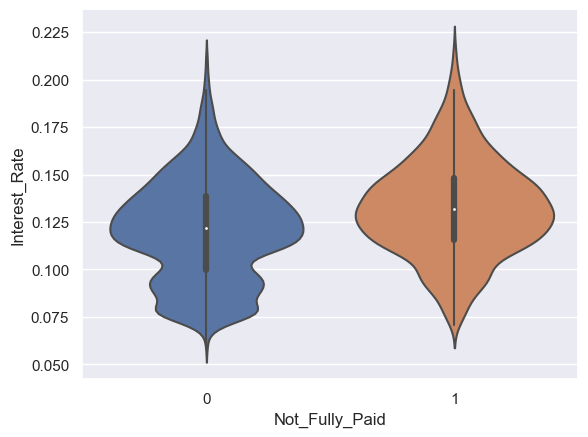

In [26]:
sns.violinplot(data=df, x="Not_Fully_Paid", y="Interest_Rate")

 It implies that the likelihood of loan repayment status (fully paid or not fully paid) is not influenced by the interest rates since the data is dense around the median values, i wonder

<AxesSubplot:xlabel='Interest_Rate', ylabel='Count'>

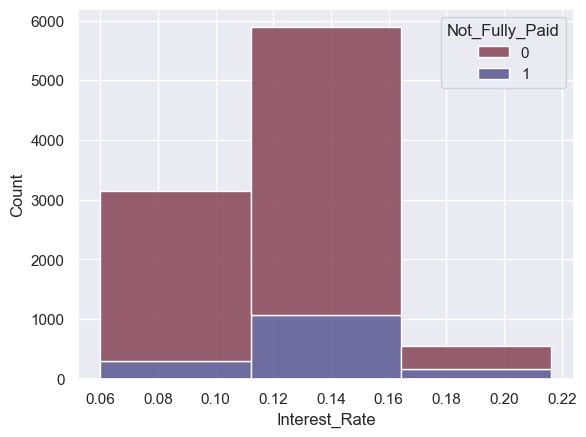

In [27]:
sns.histplot(data=df, x="Interest_Rate", hue = "Not_Fully_Paid", bins=3, palette = "icefire_r", multiple="stack")

would it be right to assume that three bins indicate the lowest, medium and highest interest rates and its distribution ?
And in that case, values between 0.11 and 0.16 has the highest distribution

# Installment

In [28]:
df["Installment_Interact"] = df["Installment"] * df["Interest_Rate"]

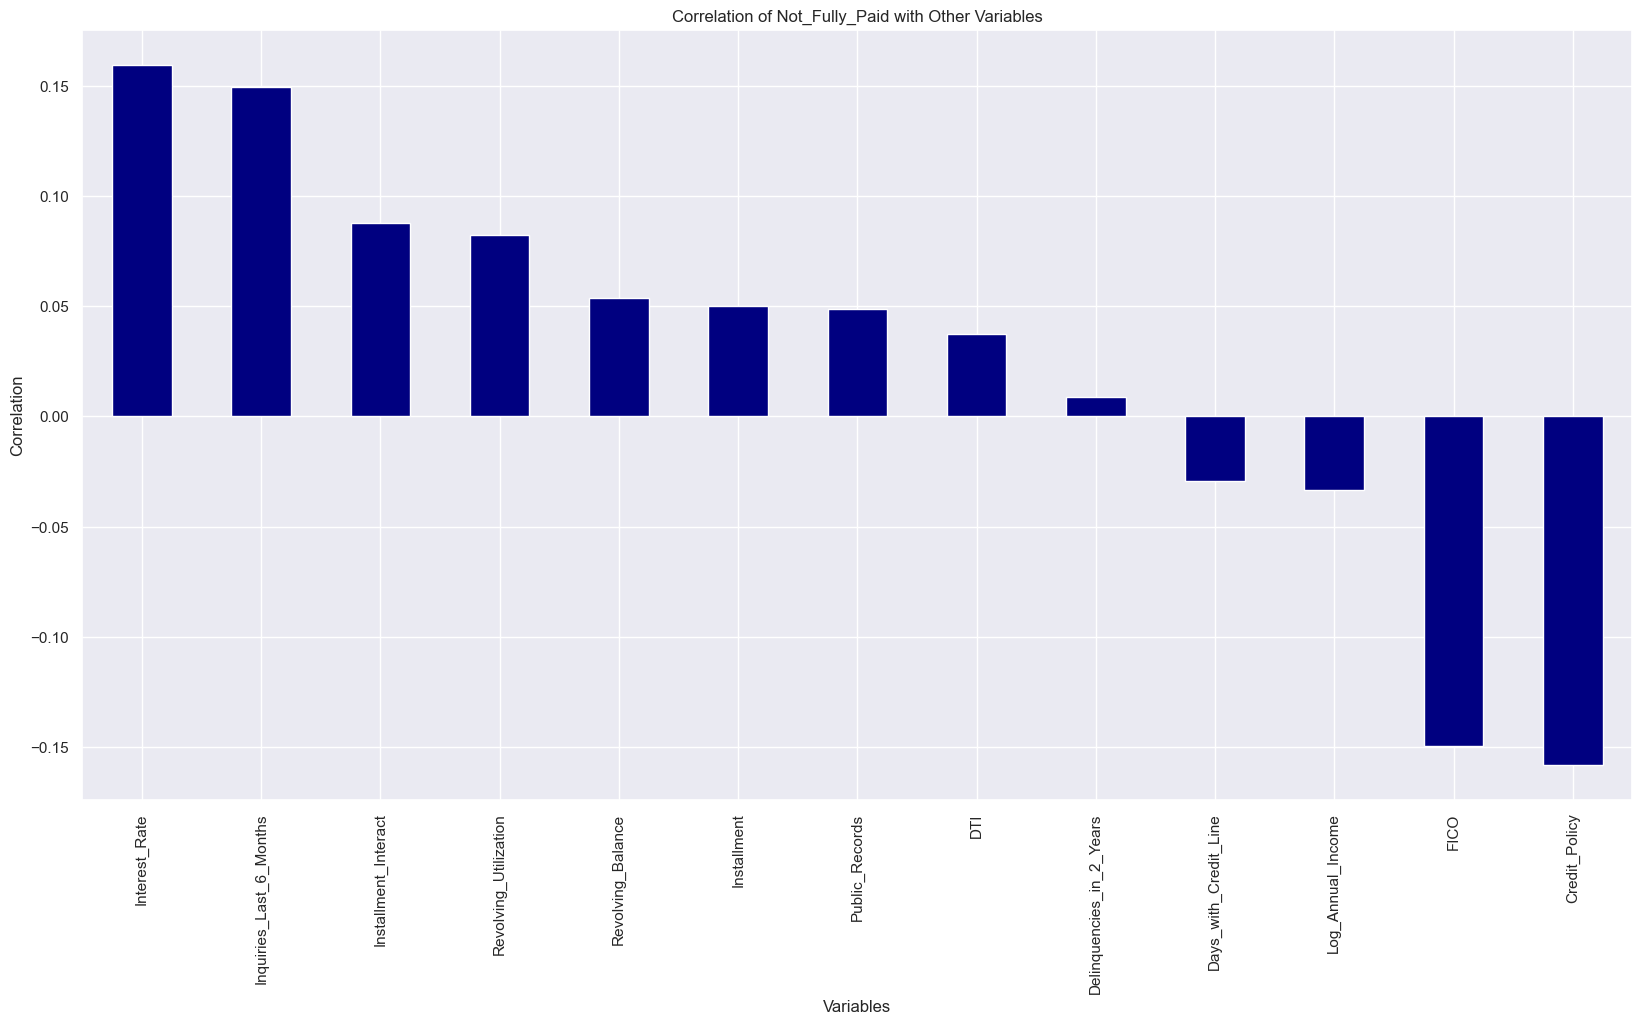

In [29]:
correlation = df.corr()['Not_Fully_Paid'].drop('Not_Fully_Paid')  # Calculate correlation excluding 'Not_Fully_Paid'
correlation.sort_values(ascending=False).plot(kind='bar', figsize=(20, 10), color='navy')  # Plot the correlation values

plt.title("Correlation of Not_Fully_Paid with Other Variables")
plt.xlabel("Variables")
plt.ylabel("Correlation")

plt.show()

- well for some reason installment_interact has the 3rd highest correlation, good.
- Internet's advice: it's important to consider the interpretability and potential multicollinearity issues when using interaction terms in your models.

In [30]:
df.sample(10)

,Credit_Policy,Purpose,Interest_Rate,Installment,Log_Annual_Income,DTI,FICO,Days_with_Credit_Line,Revolving_Balance,Revolving_Utilization,Inquiries_Last_6_Months,Delinquencies_in_2_Years,Public_Records,Not_Fully_Paid,Installment_Interact
9093,0,debt_consolidation,0.1442,137.54,10.596635,22.32,707,7409.958333,12121,89.8,7,1,0,1,19.833268
4058,1,credit_card,0.0800,313.37,11.326596,8.79,777,6120.000000,1226,6.8,3,0,0,0,25.069600
7509,1,debt_consolidation,0.1273,805.59,12.072541,10.65,717,3840.041667,31973,74.4,0,0,0,0,102.551607
6951,1,all_other,0.0894,381.26,10.673596,12.58,777,2160.000000,1876,20.2,0,0,0,0,34.084644
3122,1,debt_consolidation,0.0963,104.31,8.987197,13.80,722,4380.000000,5136,34.9,2,0,0,1,10.045053
6822,1,small_business,0.1670,355.02,11.429544,6.89,692,5403.000000,23285,30.7,1,0,0,0,59.288340
54,1,debt_consolidation,0.1596,94.88,10.862838,12.57,627,1409.000000,3075,92.3,1,0,0,0,15.142848
7788,0,all_other,0.1533,365.69,11.034890,1.72,642,1470.000000,1437,95.8,13,0,0,1,56.060277
7180,1,credit_card,0.1062,162.80,10.126631,7.06,702,2792.041667,3780,19.4,3,0,0,0,17.289360
7853,0,home_improvement,0.1467,345.04,11.101945,0.76,647,10859.958330,991,15.2,1,3,0,0,50.617368


# Revolving_Utilization

In [31]:
col_schema["Revolving_Utilization"]

"The revolving utilization rate, representing the percentage of the individual's available credit that is being used."

A higher revolving utilization rate indicates that a borrower is utilizing a larger portion of their available credit. This can be seen as a potential risk factor because it suggests a higher reliance on credit and may indicate financial strain or difficulty in managing debt. Lenders and credit scoring models often consider high revolving utilization rates as a negative factor when assessing creditworthiness.

In [32]:
from sklearn.preprocessing import StandardScaler

df_revolve= pd.DataFrame()

df_revolve['Revolving_Utilization'] = df['Revolving_Utilization']
df_revolve['Revolving_Balance'] = df['Revolving_Balance']
df_revolve["Not_Fully_Paid"] = df["Not_Fully_Paid"]

# Scale the "Revolving_Balance" values
scaler = StandardScaler()
df_revolve['Revolving_Balance_Scaled'] = scaler.fit_transform(df_revolve['Revolving_Balance'].values.reshape(-1, 1))

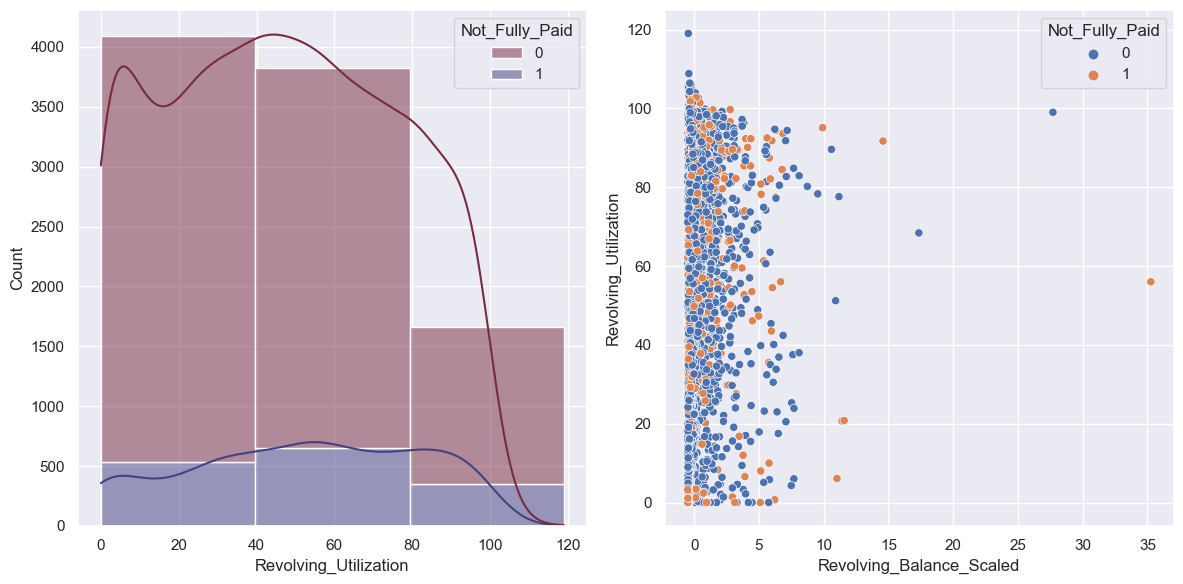

In [177]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df_revolve,
             hue='Not_Fully_Paid',
             x='Revolving_Utilization',
             palette = "icefire_r",
             multiple="stack",
             kde=True,
             bins= 3,
             ax=axes[0])
axes[0].set_xlabel('Revolving_Utilization')
axes[0].set_ylabel('Count')
axes[0].set_title('')

sns.scatterplot(data=df_revolve, x='Revolving_Balance_Scaled', y='Revolving_Utilization', hue="Not_Fully_Paid", ax=axes[1])
axes[1].set_xlabel('Revolving_Balance_Scaled')
axes[1].set_ylabel('Revolving_Utilization')
axes[1].set_title('')

plt.tight_layout()
plt.show()

## Insights

- since most of the datapoints are clustered near the y-axis, It could suggest that there is a significant number of borrowers who have low utilization rates.

- although we can see low utilization rates, the distribution of paid and not fully paid are distributed across. This doesnt suggest any directions towards lower risk for default or delinquency.

- although most of the borrowers have lower utilization rates, they tend to default. maximum fully paid users have a medium utilizaion rates(40% - 50%).


In [92]:
# Define the bin edges and labels for the bins
bin_edges = [0, 40, 80, 120]
bin_labels = [0, 1, 2]

# Bin the "Revolving_Utilization" column
df_revolve["Revolving_Utilization_Binned"] = pd.cut(df_revolve["Revolving_Utilization"], bins=bin_edges, labels=bin_labels, include_lowest=True)
df_revolve["Revolving_Utilization_Binned"] = df_revolve["Revolving_Utilization_Binned"].astype(int)

In [98]:
df = pd.merge(df, df_revolve[["Revolving_Utilization", "Revolving_Utilization_Binned"]], on="Revolving_Utilization")

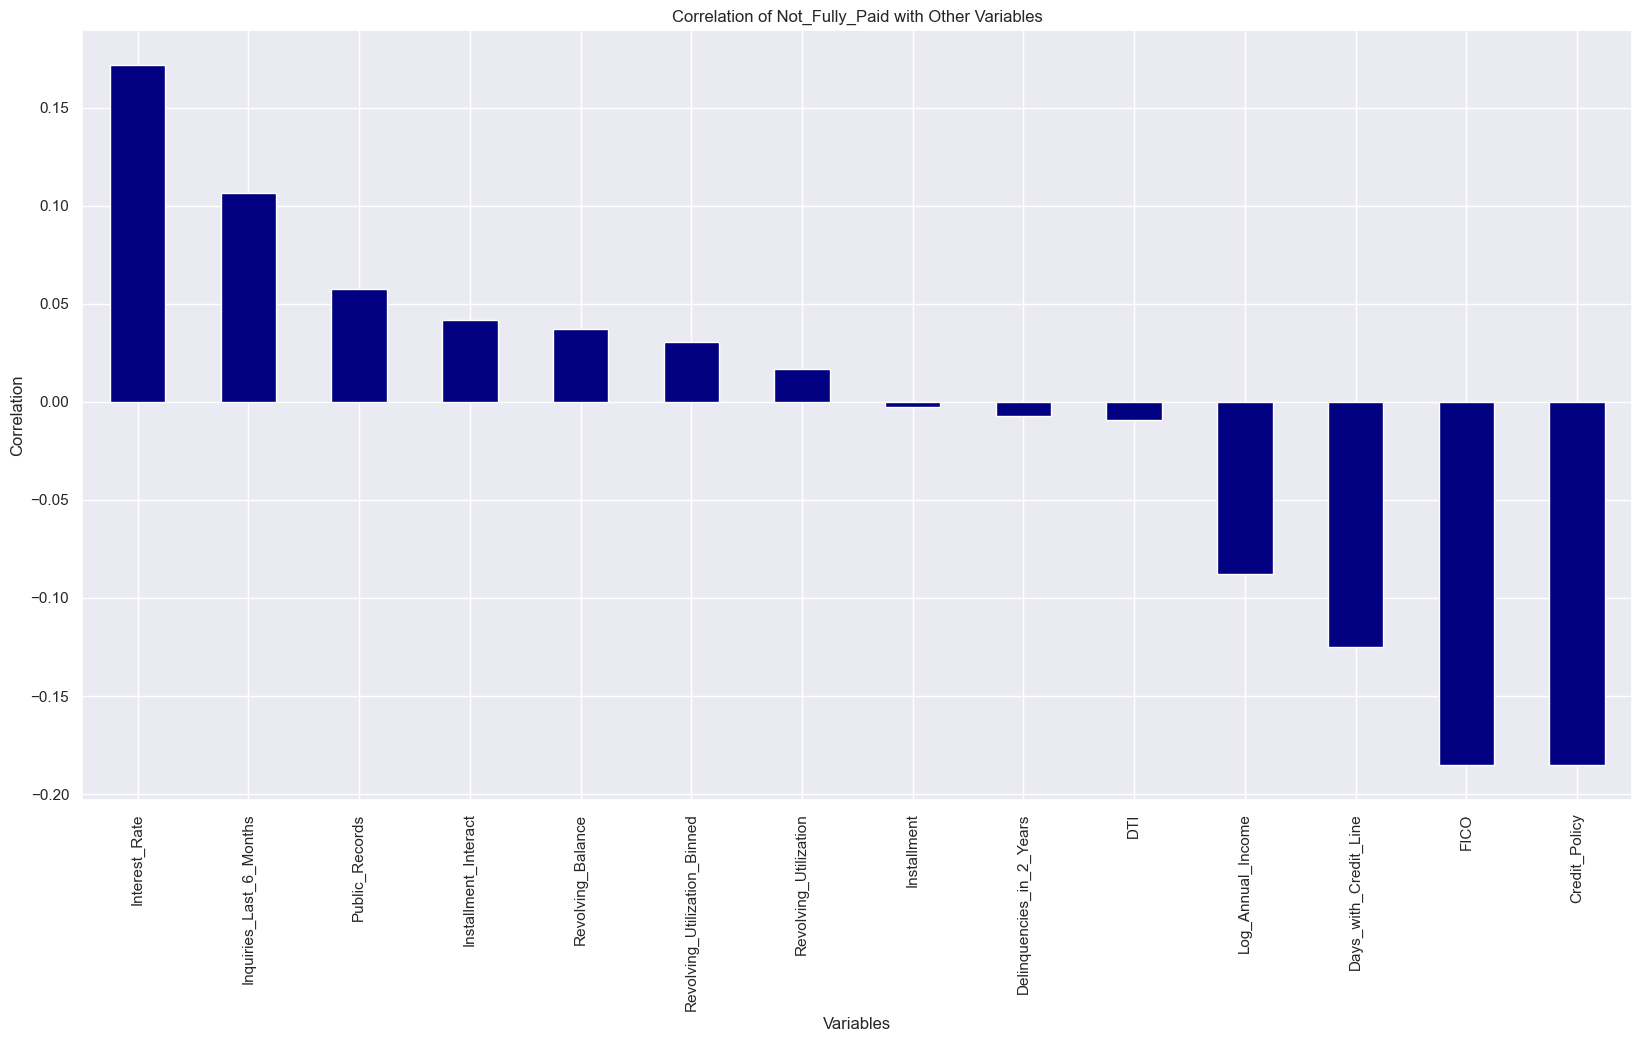

In [99]:
correlation = df.corr()['Not_Fully_Paid'].drop('Not_Fully_Paid')  # Calculate correlation excluding 'Not_Fully_Paid'
correlation.sort_values(ascending=False).plot(kind='bar', figsize=(20, 10), color='navy')  # Plot the correlation values

plt.title("Correlation of Not_Fully_Paid with Other Variables")
plt.xlabel("Variables")
plt.ylabel("Correlation")

plt.show()

# Hooray..
It looks like we have found hidden patterns in newly engineered feature which has higher correlation than the original instance

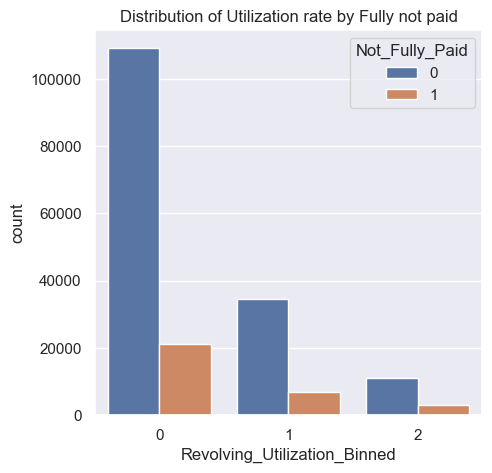

In [181]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(data=df, x="Revolving_Utilization_Binned", hue="Not_Fully_Paid")
ax.set_title("Distribution of Utilization rate by Fully not paid")
plt.show()

In [254]:
df_utilization = df.groupby(["Revolving_Utilization_Binned", "Not_Fully_Paid"])["Not_Fully_Paid"].count().unstack().reset_index()
df_utilization.columns = ["Revolving_Utilization_Binned", "Unpaid", "Paid"]
df_utilization["Total"] = df_utilization["Paid"] + df_utilization["Unpaid"]
df_utilization["Percentage_Paid"] = (df_utilization["Paid"] / df_utilization["Total"] * 100).round(2)
df_utilization["Percentage_Unpaid"] = (df_utilization["Unpaid"] / df_utilization["Total"] * 100).round(2)
df_utilization["Revolving_Utilization_Binned"] = df_utilization["Revolving_Utilization_Binned"].replace({0: "low", 1: "medium", 2: "high"})


In [256]:
df_utilization

,Revolving_Utilization_Binned,Unpaid,Paid,Total,Percentage_Paid,Percentage_Unpaid
0,low,109112,21026,130138,16.16,83.84
1,medium,34563,6938,41501,16.72,83.28
2,high,10912,2949,13861,21.28,78.72


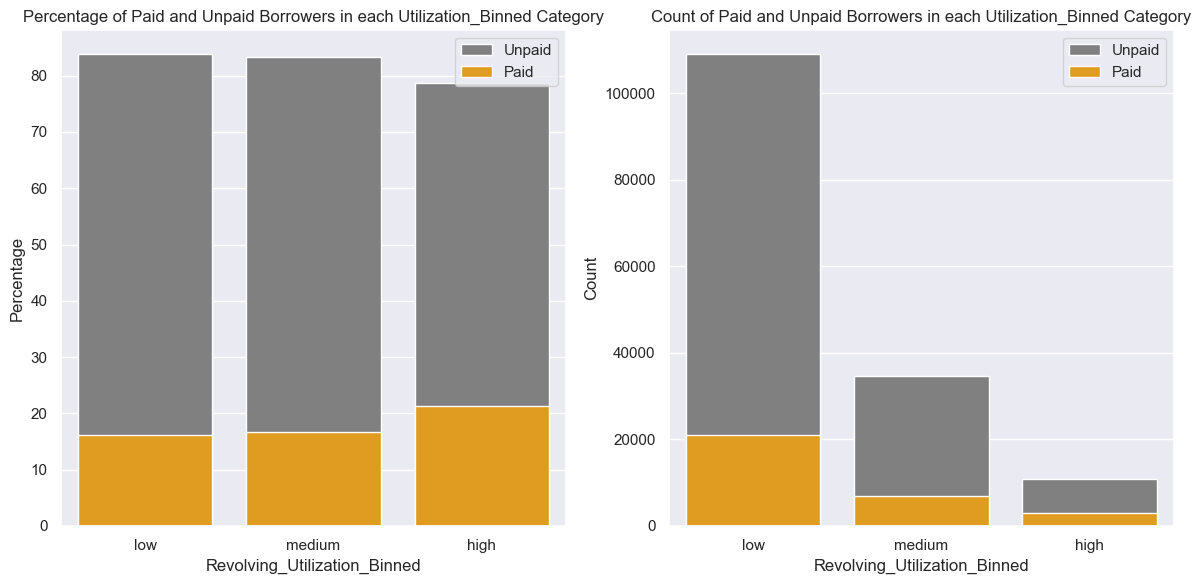

In [265]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the bar plot on the left subplot
sns.barplot(data=df_utilization, x="Revolving_Utilization_Binned", y="Percentage_Unpaid", color="grey", label="Unpaid", ax=axes[0])
sns.barplot(data=df_utilization, x="Revolving_Utilization_Binned", y="Percentage_Paid", color="orange", label="Paid", ax=axes[0])
axes[0].set_xlabel("Revolving_Utilization_Binned")
axes[0].set_ylabel("Percentage")
axes[0].set_title("Percentage of Paid and Unpaid Borrowers in each Utilization_Binned Category")
axes[0].legend()

# Plot the count plot on the right subplot
sns.barplot(data=df_utilization, x="Revolving_Utilization_Binned", y="Unpaid", color="grey", label="Unpaid", ax=axes[1])
sns.barplot(data=df_utilization, x="Revolving_Utilization_Binned", y="Paid", color="orange", label="Paid", ax=axes[1])
axes[1].set_xlabel("Revolving_Utilization_Binned")
axes[1].set_ylabel("Count")
axes[1].set_title("Count of Paid and Unpaid Borrowers in each Utilization_Binned Category")
axes[1].legend()

plt.tight_layout()
plt.show()


- The majority of borrowers fall into the "low" utilization binned category, followed by the "medium" and "high" categories. This indicates that a significant portion of borrowers have lower utilization rates.
- The **default rate (unpaid borrowers) tends to decrease as the utilization binned category increases**. Borrowers in the "high" utilization binned category have the highest paid rate of 21.28%, followed by the "medium" category with a paid rate of 16.72%, and the "low" category with a paid rate of 16.16%. This suggests that higher utilization rates are associated with a lesser likelihood of default.
- The data indicates that **borrowers with higher utilization rates (medium and high categories) are more likely to fully repay their loans**. This could be due to various factors, such as **higher income levels**, better financial management, or a stronger credit profile.
- 

# Salary

In [266]:
df.columns

Index(['Credit_Policy', 'Purpose', 'Interest_Rate', 'Installment',
       'Log_Annual_Income', 'DTI', 'FICO', 'Days_with_Credit_Line',
       'Revolving_Balance', 'Revolving_Utilization', 'Inquiries_Last_6_Months',
       'Delinquencies_in_2_Years', 'Public_Records', 'Not_Fully_Paid',
       'Installment_Interact', 'Revolving_Utilization_Binned'],
      dtype='object')

In [268]:
df_sal = df.groupby("Revolving_Utilization_Binned")["Log_Annual_Income"].mean().reset_index(name="Log_Annual_Income")

In [273]:
df_sal["Revolving_Utilization_Binned"] = df_sal["Revolving_Utilization_Binned"].replace({0: "low", 1: "medium", 2: "high"})
df_sal

,Revolving_Utilization_Binned,Log_Annual_Income
0,low,10.805818
1,medium,10.943942
2,high,11.024078


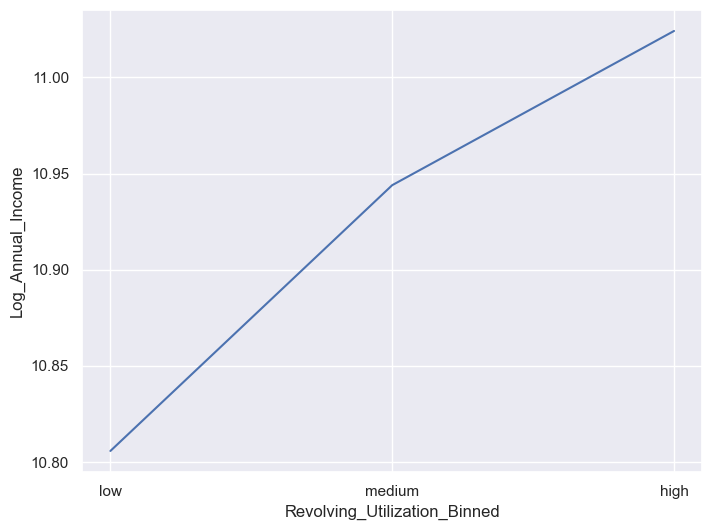

In [278]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=df_sal, x="Revolving_Utilization_Binned", y="Log_Annual_Income", palette="Blues")
plt.xlabel("Revolving_Utilization_Binned")
plt.ylabel("Log_Annual_Income")
#plt.title("Log Annual Income by Revolving_Utilization_Binned")
plt.show()

okay, Assumption checks out. **Borrowers with high Utilization rate has high Annual Income**